In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../scripts')

In [22]:
df = pd.read_csv('../data/FuelConsumption-simple-FRA.csv')
df = df[df['Annee modele'] == 2014]

## Data Characteristics
We will be working with the file **FuelConsumption-simple.csv**, a fuel consumption dataset that contains fuel consumption ratings for canadian cars as well as estimated carbon dioxide emissions fo passenger vehicles for sale in Canada in 2014 (latest year available with fuel consumption). [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

The attributes of the data in this case are the following:

- **MODELYEAR** (2014 only — last year)
- **MAKE** (e.g. Acura)
- **MODEL** (e.g. ILX)
- **VEHICLE CLASS** (e.g. SUV)
- **ENGINE SIZE** (e.g. 4.7)
- **CYLINDERS** (e.g 6)
- **TRANSMISSION** (e.g. A6)
- **FUEL CONSUMPTION in CITY(L/100 km)** (e.g. 9.9)
- **FUEL CONSUMPTION in HWY (L/100 km)** (e.g. 8.9)
- **FUEL CONSUMPTION COMB (L/100 km)** (e.g. 9.2)
- **CO2 EMISSIONS (g/km)** (e.g. 182)

## Data Exploration

We can already tell there are different types of data in this database — numerical and categorical. Beginning with the numerical part, we can start by observing the values obtained with the ```.describe()``` function that gives us a picture of what are we working with, if there is something irrational with the data, and so on and so forth.

In [23]:
df.describe()

,Annee modele,Cylindree (L),Cylindres,Ville (L/100 km),Route (L/100 km),Combinee (L/100 km),Combinee (mi/gal),Emissions de CO2 (g/km)
count,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,2014.0,3.343539,5.787453,13.290543,9.470318,11.575843,26.459738,256.058989
std,0.0,1.417651,1.799915,4.111111,2.792400,3.488817,7.483394,63.610881
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.200000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.600000,10.725000,13.400000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


First of all, since we can observe the numerical data has a column that is essentially useless, `Annee modele`, we will drop it to make the database more clear — other than that, the data has shown no values out of place, so we can assume it is fully clean and can therefore continue with the analysis.

Count shows there are no NaN values, therefore, it is not necessary to review cells or to apply any data cleaning methods to those attributes. Same applies to ```min``` and ```max``` — in all categories there are no values that appear to be irrational within the scope of each attribute, therefore we can consider the numerical attributes to be clean and ready for analysis.

In [24]:
cdf = df[['Cylindree (L)','Cylindres','Combinee (L/100 km)','Emissions de CO2 (g/km)']]
cdf.head(n=5)

,Cylindree (L),Cylindres,Combinee (L/100 km),Emissions de CO2 (g/km)
16785,2.0,4,8.5,196
16786,2.4,4,9.6,221
16787,1.5,4,5.9,136
16788,3.5,6,11.1,255
16789,3.5,6,10.6,244


For the modeling, lets take some attributes off the clean dataframe to do some exploration with it, using only the main key data that could be related to fuel consumption:

- Cylindree (L)
- Cylindres
- Combinee (L/100 km)
- Emissions de CO2 (g/km)

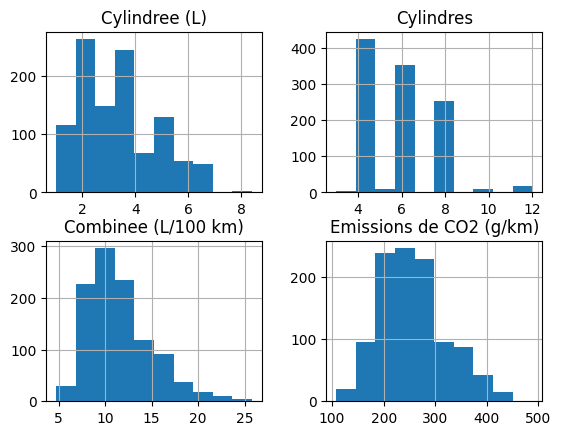

In [25]:
viz = cdf[['Cylindree (L)','Cylindres','Combinee (L/100 km)','Emissions de CO2 (g/km)']]
viz.hist()

plt.show()

We can already observe clear patters there, based on what we want to know:

- In the Canadian passenger vehicle market, most models in sale were offered an average of 3.34L displacement on their engines.
- In terms of cylinders, 4 cyl vehicles are the most common, followed by 6, then 8, with other variants being much more rare. The mean is very close to 6 cylinders.
- Fuel consumption (l/100) on average, combined, is high — The mean is slightly over 11.5l/100, because of the nature of the canadian car market.
- C02 emissions were very high — on average, 256g/km, which would be seen nowadays as a very high value (product of high power, high displacement vehicles being the norm in Canada).

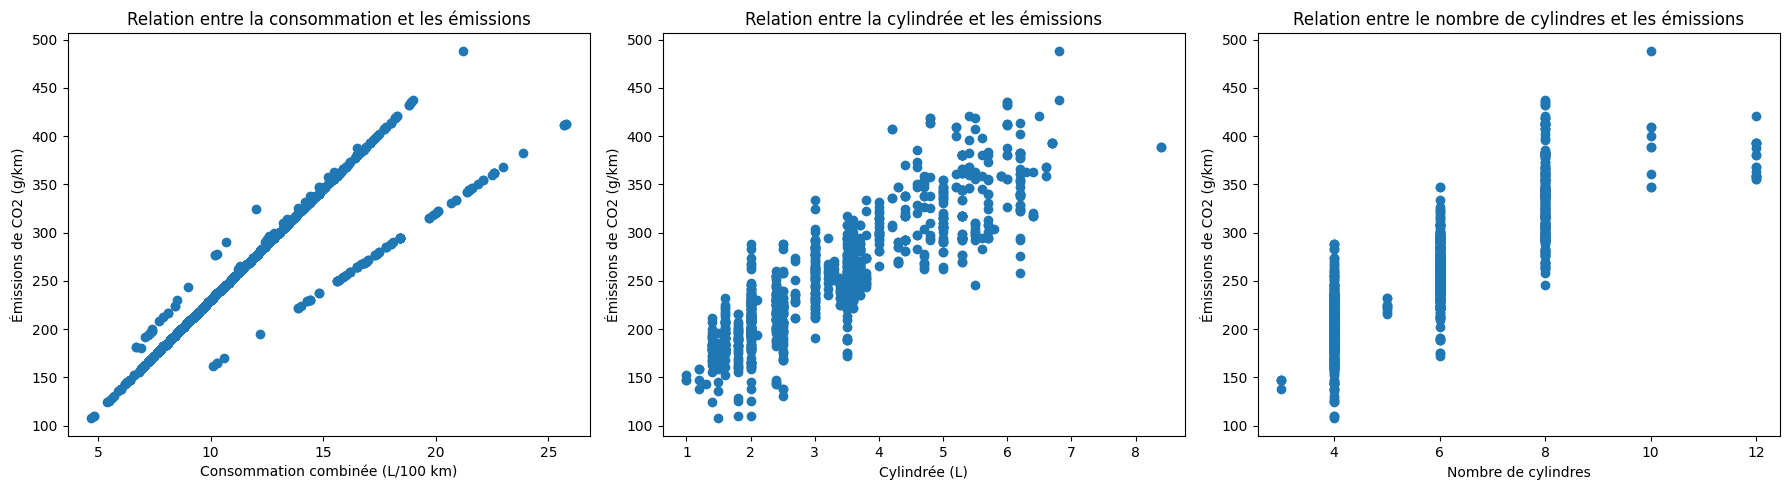

In [26]:
from plotting import scatter_emissions

scatter_emissions(cdf)

Au-dessus, on peut déjà observer les tendances entre la consommation, la cylindrée et le nombre de cylindres, et leurs relations avec les émissions de CO₂. Le résultat est clair : les moteurs de plus grande cylindrée produisent généralement davantage d’émissions. La même tendance s’observe avec la consommation, où l’on voit que les moteurs qui consomment plus de carburant génèrent également plus d’émissions.

On peut également constater que les émissions ne sont pas uniquement liées à la taille du moteur, mais aussi au modèle ou à la marque qui les produit. Certains moteurs à huit cylindres présentent une consommation inférieure à celle de plusieurs moteurs à six, voire à quatre cylindres, ce qui indique que d’autres facteurs jouent également un rôle important.

## Data Cleaning

In [27]:
df_2014 = df.drop('Annee modele', axis=1)

However, categorical data is left out by that function, so we will analyse them individually to observe any erratic values in them, or if the classification is meaningful.

In [28]:
# Analysing each attribute's unique values we only found odd values in df['Transmission``]
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

We can observe all attributes of the database offer correct information — no cleaning is needed and all of them are meaningful for its analysis.
The only thing that does not deserve action but could be noted is the depth of the ```Modele``` attribute, down to model variation, packages and specific trims.

Note — even though the ```Transmission``` attribute makes a distinction between number of greats or type (Manual, Automatic), some require a better explanation based on the type:

- ```A``` refers to traditional torque-converter transmissions
- ```AS``` are essentially dual-clutch transmissions (lever-based)
- ```AV``` are continuously variable transmissions

But since ```AV```transmissions do not have gears, data should be reworked so it displays every variant as simply ```AV```.

In [29]:
df['Transmission'] = df['Transmission'].replace(r'AV\d+', 'AV', regex=True)

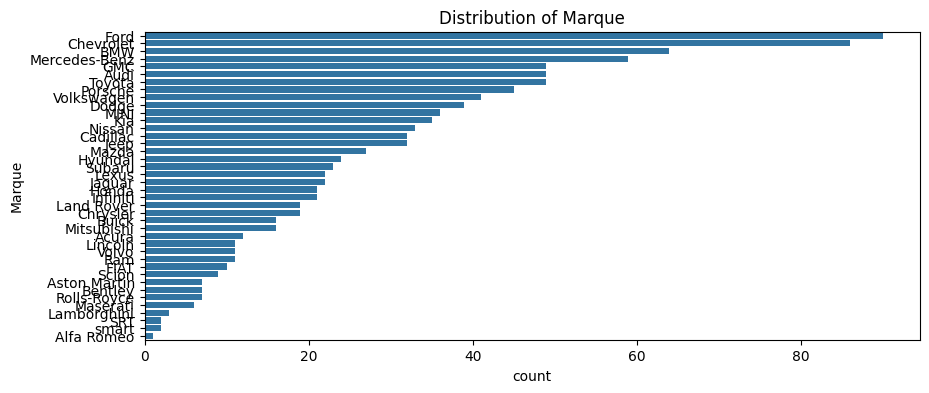

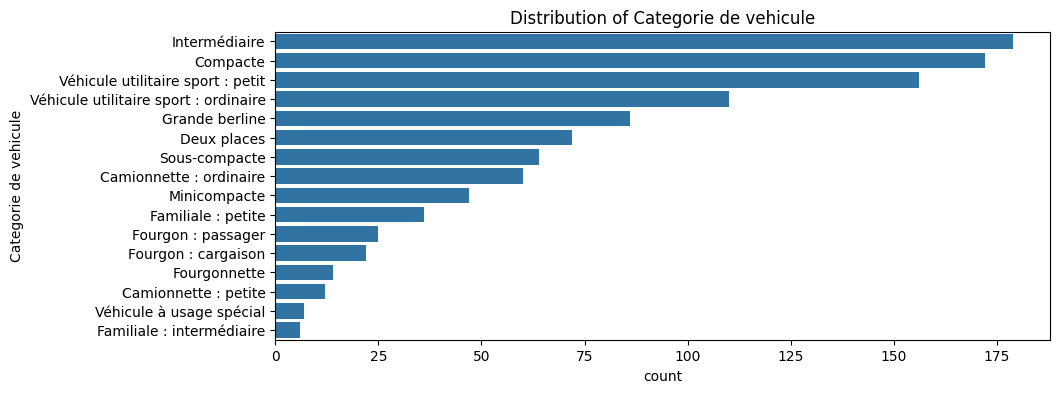

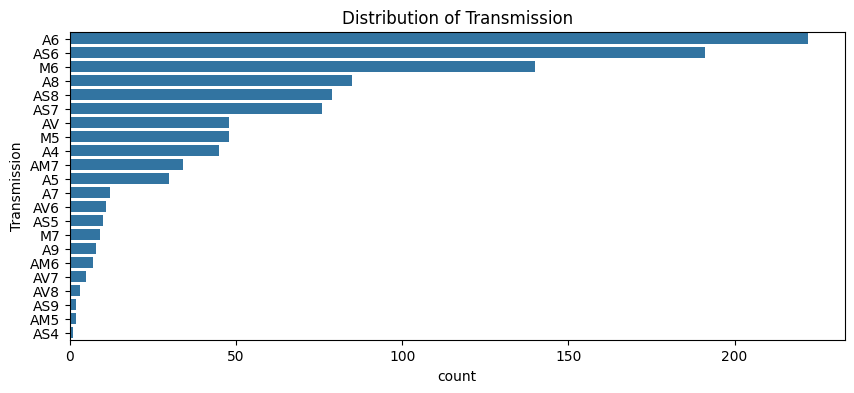

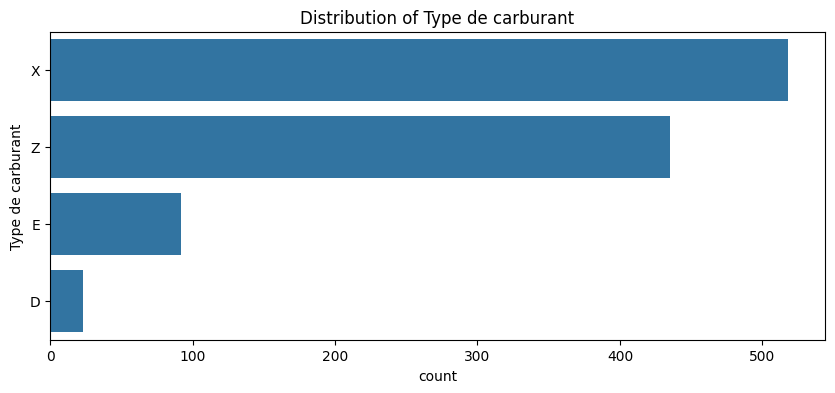

In [30]:
categorical_cols = ['Marque', 'Categorie de vehicule', 'Transmission', 'Type de carburant']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=df_2014[col], order=df_2014[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()


We can quickly see how the numeric attributes relate to each other, especially which ones are most linked to CO₂ emissions.

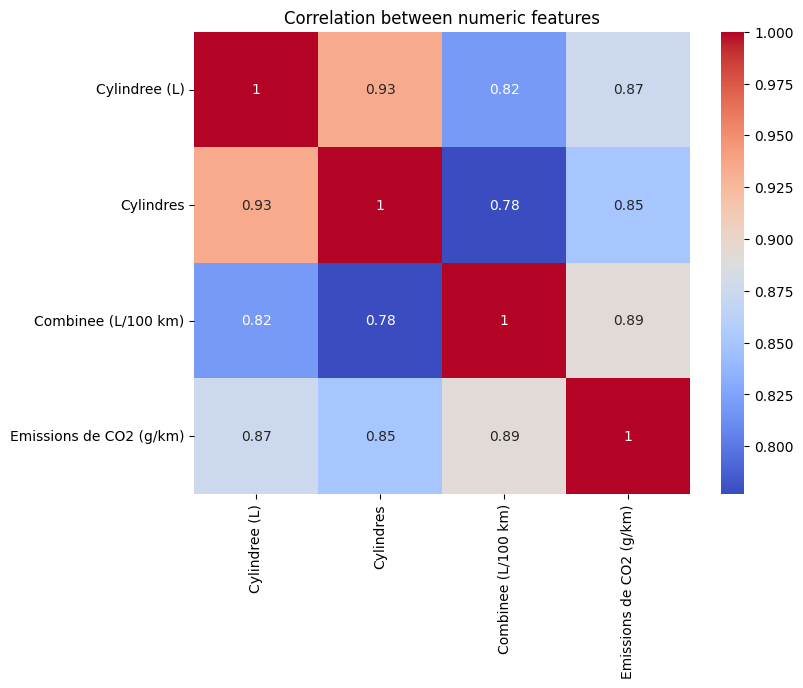

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(cdf.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between numeric features")
plt.show()


# Boxplots to check for outliers

Even though the data seems clean, boxplots help visualize the distribution and detect unusual values.

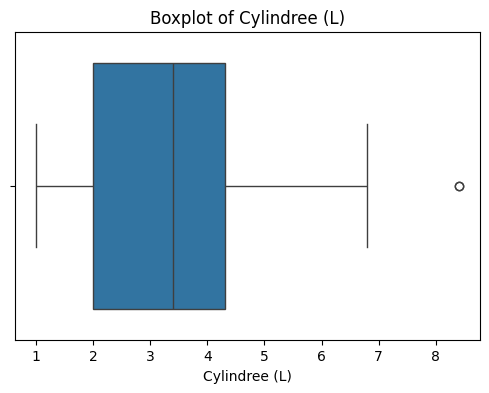

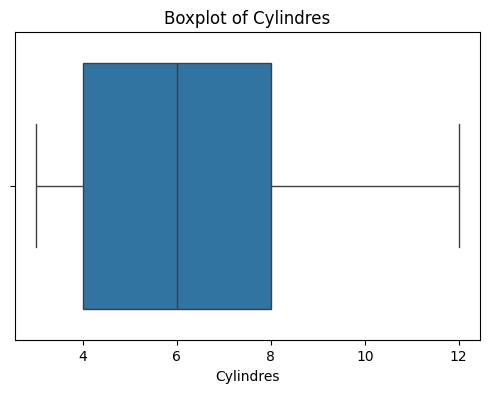

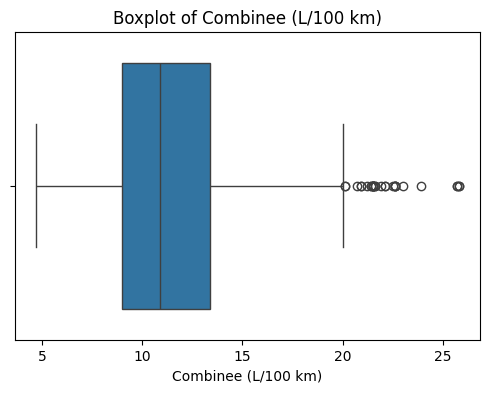

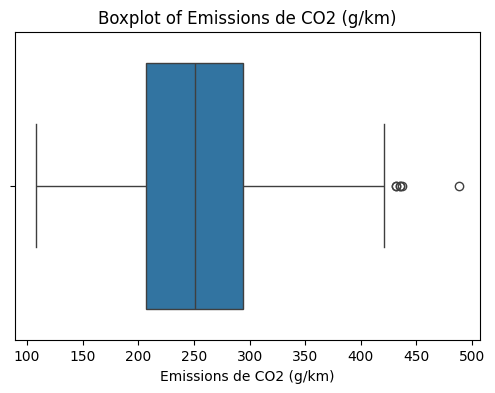

In [36]:
for col in cdf.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=cdf[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


It’s helpful to see how brands, vehicle classes, transmissions, and fuel types are distributed.

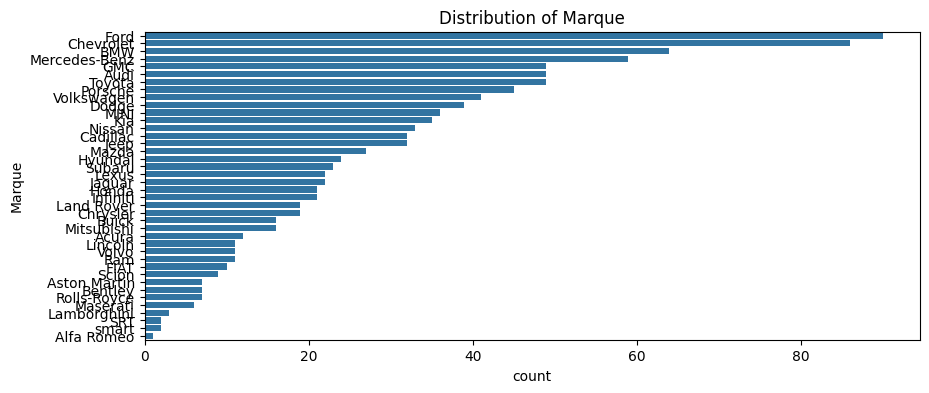

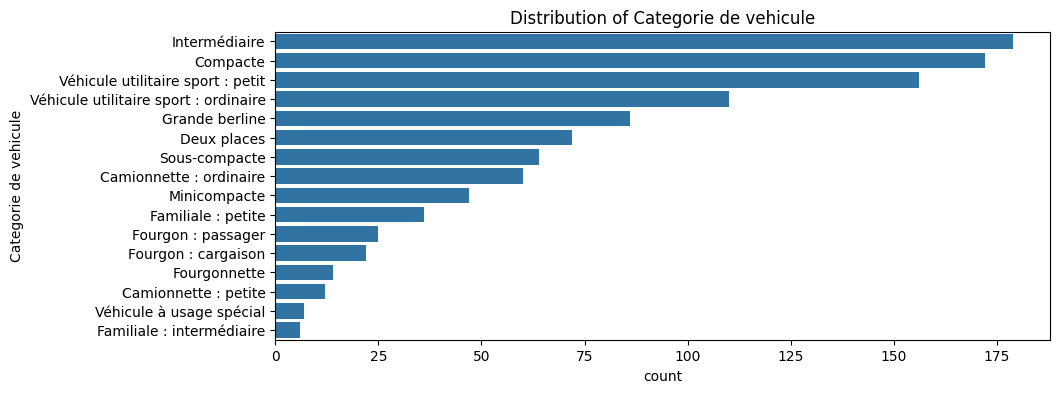

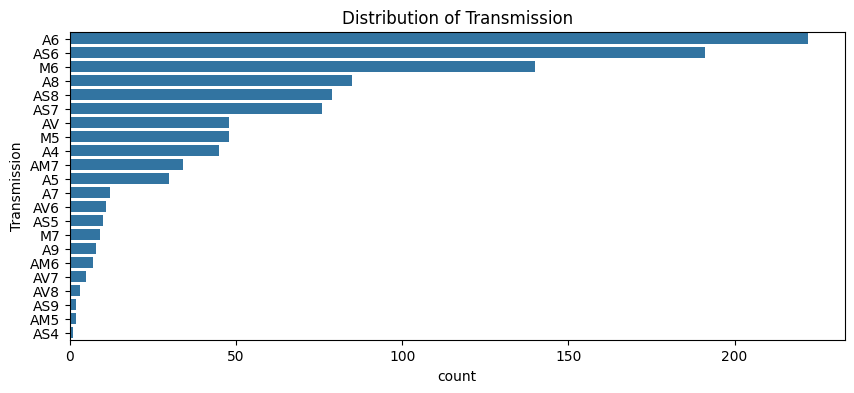

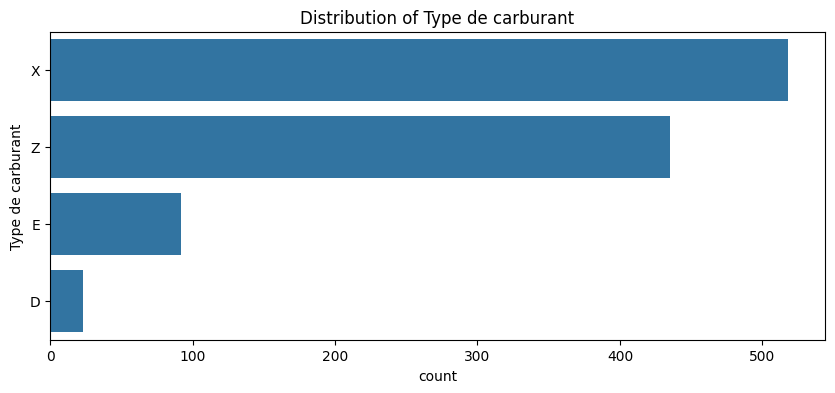

In [33]:
categorical_cols = ['Marque', 'Categorie de vehicule', 'Transmission', 'Type de carburant']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=df_2014[col], order=df_2014[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()


In [34]:
df.head()

,Annee modele,Marque,Modele,Categorie de vehicule,Cylindree (L),Cylindres,Transmission,Type de carburant,Ville (L/100 km),Route (L/100 km),Combinee (L/100 km),Combinee (mi/gal),Emissions de CO2 (g/km),Indice de CO2,Indice de smog
16785,2014,Acura,ILX,Compacte,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,s.o.,s.o.
16786,2014,Acura,ILX,Compacte,2.4,4,M6,Z,11.2,7.7,9.6,29,221,s.o.,s.o.
16787,2014,Acura,ILX Hybrid,Compacte,1.5,4,AV,Z,6.0,5.8,5.9,48,136,s.o.,s.o.
16788,2014,Acura,MDX 4WD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,s.o.,s.o.
16789,2014,Acura,RDX AWD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,s.o.,s.o.


That done, we have essentially cleaned the data fully and can proceed to model it in the following notebook.

In [35]:
df.to_csv('../data/clean-data-FRA.csv')